<a href="https://colab.research.google.com/github/ayush-0210/Edmunds-Car-Similarity/blob/main/Edmunds-Car-Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Team Members: 


1.   Kaushik Kumaran (kk34537)
2.   Ayush Malani (am95655)
3.   Harsh Mehta (hdm564)
4.   Charan Musunuru (cm59982)
5.   Allie Touchstone (awt529)


## Web scraping code

Installing the required libraries

In [ ]:
#Selenium is an open-source tool that automates web browsers.
!pip install selenium
!apt-get -q update   #Used to handle installation and removal of softwares and libraries
!apt install -yq chromium-chromedriver #ChromeDriver is a separate executable that Selenium WebDriver uses to control Chrome.
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver 
#WebDriver is a browser automation framework that works with open source APIs. 
#The framework operates by accepting commands, sending those commands to a browser, and interacting with applications.
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
!pip install nltk==3.4

     |████████████████████████████████| 904 kB 5.0 MB/s 
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [67.4 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://security

Importing the necessary libraries

In [ ]:
# !pip install pandas==1.3.3
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import MDS
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
wd = webdriver.Chrome('chromedriver',options=chrome_options)

In [ ]:
url = "https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p"

comments = pd.DataFrame(columns = ['Date','comments']) 

# Starting from the last page to get the latest comments and run the counter until 5000 in the while loop, this gave us 5033 entries in total 
# because for the last (435th) page there are 33 comments and the counter starts after that 

counter = 0
page_number = 435
while ((counter<5000) and (page_number>0)):
  comment_ids = []
  wd.get(url + str(page_number))  
  page_number -= 1
  ids = wd.find_elements_by_xpath("//*[contains(@id,'Comment_')]")
  for i in ids:
    comment_ids.append(i.get_attribute('id'))
  counter += len(comment_ids)
  for x in comment_ids:
    # Extract dates from each post
    user_date = wd.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[2]/span[1]/a/time')[0]
    date = user_date.get_attribute('title')

    # Extract message for each user on a page removing the blockquote text (comment replies)
    user_message = wd.find_elements_by_xpath('//*[@id="' + x + '"]/div/div[3]/div/div[1]')[0]
    if  wd.find_elements_by_xpath('//*[@id="' + x + '"]/div/div[3]/div/div[1]/blockquote'):
      blockquote = wd.find_elements_by_xpath('//*[@id="' + x + '"]/div/div[3]/div/div[1]/blockquote')[0]
      comment = user_message.text.replace(blockquote.text,'')
    else:
      comment = user_message.text
                        
  # Adding date and comment for each user in a dataframe    
    comments.loc[len(comments)] = [date,comment]

In [ ]:
# Cleaning the code
comments['Date'] = pd.to_datetime(comments['Date']).dt.date

def clean_n(comment):
  return comment.replace('\n','')

def clean_spaces(comment):
  return comment.strip()

comments['comments'] = comments['comments'].map(clean_n).map(clean_spaces)

In [ ]:
# Creating a csv file from the dataframe
comments.to_csv("Edmunds_comments.csv", sep=",")
!ls
from google.colab import files
files.download("Edmunds_comments.csv")

'car models and brands.csv'   Edmunds_comments.csv   sample_data


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Uploading the data frame 
from google.colab import files
uploaded = files.upload()

Saving car models and brands.csv to car models and brands.csv
Saving Edmunds_comments.csv to Edmunds_comments.csv


In [ ]:
comments = pd.read_csv('Edmunds_comments.csv')

# Task A: Zipf's Law


In [ ]:
def word_counts_z(x):
    # Word tokenize your comment
    x = str(x)
    tokens = word_tokenize(x.lower())
    # Creating a word frequency dictionary
    counter = Counter(tokens)
    return counter

# Zipf's law
zipfs_df = pd.DataFrame(list(comments['comments'].map(word_counts_z)))
zipfs_df = zipfs_df.fillna(0)

freq = dict(zipfs_df.sum())
new = dict(sorted(freq.items(), reverse=True, key=lambda item: item[1]))

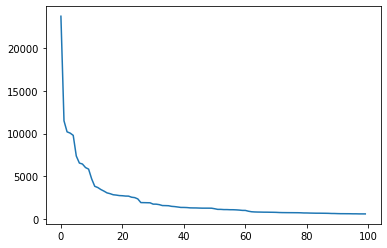

In [ ]:
# Zipf's law with no punctuations (hardcoded from the common top 100 values)

new = dict(sorted(freq.items(), reverse=True, key=lambda item: item[1]))
rem = ['!','$',"''","'m","'s",'(',')',',','-','--','.','...',':','?','``',"n't"]
for i in rem:
  new.pop(i)
c = 0
top_100 = {}
for i in new:
  top_100[i] = new[i]
  if(c == 99):
    break
  c += 1
pd.Series(top_100.values()).plot()

The graph above follows Zipf's law. With increase in the rank of the word in terms of frequency, the frequency of the words decreases in accordance with Zipf's law.

# Task B: Top 10 brands from frequency counts

In [ ]:
mb = pd.read_csv('car models and brands.csv')

In [ ]:
#removing words that are not brands from the brand column
mb = mb[(mb['Brand'] != 'car') & (mb['Brand'] != 'problem') & (mb['Brand'] != 'sedan')]
mb['Brand'].unique()

array(['acura', 'audi', 'bmw', 'buick', 'cadillac', 'chevrolet',
       'chrysler', 'dodge', 'ford', 'honda', 'hyndai kia', 'hyundai',
       'hyundai,', 'hyundai.', 'infiniti', 'kia', 'kia,', 'kia.',
       'lincoln', 'mazda', 'mercedes', 'mercedes benz', 'mercedes-benz',
       'mercury', 'mitsubishi', 'nissan', 'nissan.', 'pontiac', 'saturn',
       'seat', 'subaru', 'suzuki', 'toyata', 'toyota', 'volkswagen',
       'volkwagen', 'volvo'], dtype=object)

In [ ]:
dict_mb = pd.Series(mb.Brand.values,index=mb.Model).to_dict()

In [ ]:
def word_counts(x):
    # Word tokenize your comment
    x = str(x)
    tokens = word_tokenize(x)
    # Collecting the stopwords
    stop_words = set(stopwords.words('english'))
    
    # Removing the stopwords
    tokens_rm_stp = []
    for token in tokens:
        lt = token.lower() 
        if lt not in stop_words:
          # Replace the models with brands
            if(lt in dict_mb):
              lt = dict_mb[lt]
            tokens_rm_stp.append(lt)
    
    # Creating a word frequency dictionary
    counter = Counter(tokens_rm_stp)
    return counter

In [ ]:
#applying the word count function to each comment in the dataframe and creating the lift_df dataframe
lift_df = pd.DataFrame(list(comments['comments'].map(word_counts)))
lift_df = lift_df.fillna(0)

In [ ]:
# all_word_counts.to_csv("all_word_counts.csv", sep=",")
# !ls
# from google.colab import files
# files.download("all_word_counts.csv")

In [ ]:
# getting the frequency counts of the brands
common = set(lift_df.columns).intersection(set(mb['Brand'].unique()))
brands_df_rep = pd.DataFrame(columns=['Brand','Count'])
for i in common:
    brands_df_rep.loc[i,'Brand'] = i
    brands_df_rep.loc[i,'Count'] = lift_df[i].sum()
    
brands_df_rep.sort_values(by = 'Count',ascending=False)[:10]

,Brand,Count
audi,audi,2026
bmw,bmw,1888
acura,acura,968
honda,honda,764
seat,seat,481
volkswagen,volkswagen,414
cadillac,cadillac,358
infiniti,infiniti,343
hyundai,hyundai,319
toyota,toyota,293


In [ ]:
#count a brand mention once per post, even if it is mentioned multiple times in the post.
lift_df = lift_df.applymap(lambda x : 0 if x == 0 else 1)
all_word_counts = pd.DataFrame(lift_df.sum().sort_values(ascending=False),columns=['count'])
brands_df = pd.DataFrame(columns=['Brand','Count'])
for i in common:
    brands_df.loc[i,'Brand'] = i
    brands_df.loc[i,'Count'] = lift_df[i].sum()
    
#brands_df.sort_values(by = 'Count',ascending=False)[:10]

# Task C: Lift ratios of top-10 brands 

In [ ]:
a = brands_df.sort_values(by = 'Count',ascending=False)[:10]
a.index.values
brands_df1 = brands_df.loc[a.index.values]
#saving the top 10 brands in top_10_brands array
top_10_brands = brands_df1.index.values

In [ ]:
#calculating lift among brands
n = len(lift_df)
lift = pd.DataFrame(columns= brands_df1.Brand, index=brands_df1.Brand)
for i in brands_df1['Brand']:
  other_brands = set(brands_df1['Brand']) - set([i])
  for j in other_brands:
    lift.loc[i,j] = n*((lift_df[i]*lift_df[j]).sum())/(brands_df1.loc[i,'Count']* brands_df1.loc[j,'Count'])

lift_half = pd.DataFrame(np.triu(lift), columns=lift.columns, index=lift.index)
lift_half = lift_half.applymap(lambda x: '-' if x==0 else x)
lift_half

Brand,bmw,audi,acura,honda,seat,volkswagen,infiniti,cadillac,toyota,hyundai
Brand,,,,,,,,,,
bmw,NaN,1.99369,1.39358,1.25405,2.11064,1.39538,2.05118,1.95725,1.51101,1.446845
audi,-,NaN,2.21534,1.81864,2.00057,2.75557,2.97045,3.07621,1.88378,1.761391
acura,-,-,NaN,3.78695,1.69213,1.43651,4.36404,2.32493,1.7401,1.911038
honda,-,-,-,NaN,1.95578,2.41971,2.16442,1.77201,3.36764,2.326646
seat,-,-,-,-,NaN,2.01288,1.47549,1.14673,2.53581,1.039618
volkswagen,-,-,-,-,-,NaN,1.86662,1.6225,2.31834,2.235843
infiniti,-,-,-,-,-,-,NaN,3.73126,2.14211,2.790755
cadillac,-,-,-,-,-,-,-,NaN,2.22745,2.513986
toyota,-,-,-,-,-,-,-,-,NaN,4.276368


# Task D: MDS Map

In [ ]:
X = lift.copy()
X.fillna(0,inplace = True)
#calculating the dissimilarity matrix
X_dissimilar = X.applymap(lambda x: 0 if x == 0 else 1/x)
X_dissimilar1 = pd.DataFrame(np.triu(X_dissimilar), columns=X_dissimilar.columns, index=X_dissimilar.index)

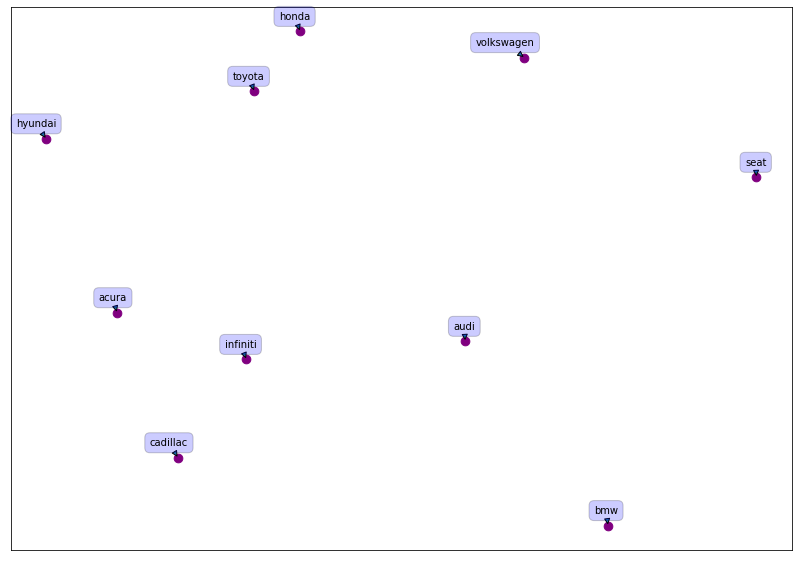

In [ ]:
#plotting the MDS map
target = X.index.values
mds=MDS(n_components=2, dissimilarity ='precomputed', random_state=10)
results=mds.fit(X_dissimilar)
coordinates=results.embedding_

x = coordinates[:,0]
y = coordinates[:,1]

plt.figure(figsize=(14,10))
plt.scatter(x,y, marker='o', color='purple', s=75)
for brand, x_coord, y_coord in zip(list(target), x, y):
  plt.annotate(s=brand, 
               xy=(x_coord,y_coord),
               xytext = (10, 10),
               textcoords = 'offset points', 
               ha = 'right', 
               va = 'bottom',
               bbox = dict(boxstyle = 'round,pad=0.5', fc = 'blue', alpha = 0.2),
               arrowprops = dict(arrowstyle = 'simple', connectionstyle = 'arc3,rad=0'))

plt.xticks([])
plt.yticks([])
plt.show()

# Task E: Insights from Tasks C and D

We used the Entry Level Luxury Performance Sedans forum (URL included below), and in that forum, we scraped the 5033 newest comments for our analysis as that would be more relevant for the client. We manually found the most reference adjectives to be the top 5 attributes in task F. We based our aspirations list on the combinations of certain words found in the posts. That list of words was compiled into ‘aspir_list’ to establish which posts are aspirational. When looking at the aspirations, we discovered that Hyundai scored much higher than other brands. Upon further review, we found that 42% of these aspirational comments were regarding the Hyundai brand Genesis.

When considering tasks C and D (lift ratios and MDS map), we can observe the results of these analyses. The highest lift value comes from Acura with Infiniti. These brands are close to the center of the graph, suggesting that they contain lots of the same ‘base’ features, while other brands stray farther to the edges as their references are most likely from their other features. The results also show that BMW is distant from all other brands on the map and not having a lift value higher than 2.11 (the lowest maximum lift value for a brand); they have found ways to set themselves apart from the competition. The real competitors can be found through high lift values and/or a small relative distance on the MDS map. The high lift values equate to brands mentioned together, but that does not always mean they are similar. While a small distance apart on the MDS map suggests the brands are similar but says nothing about if the brands are mentioned together.

The best way to find the real competitors is by comparing the lift values and the locations on the map, such as how the lift values and MDS map show that Acura and Infiniti are competitors. These are similar cars showing that this makes sense. Additionally, there are examples such as Acura and Volkswagen or BMW and Seat. In both cases, they are far apart on the map; however, people talk about the two together, making them competitors. This can be seen by both sets of brands having high lift values in these to their competitor. An example of this is Honda and Acura; they have a very high lift value but are not close together on the MDS map. 

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p

# Task F: 5 most frequently mentioned attributes

In [ ]:
# Manually checked the top 5 attributes from the counts list. The top 5 attributes are:
# Engine, Performance, Luxury, Money, Price. Extracting these from all_word_counts and making a lift chart

attributes = ['engine','performance','luxury','money','price']

lift_attributes = pd.DataFrame(columns=lift.columns,index=attributes)

for i in attributes:
  for j in lift.columns:
    lift_attributes.loc[i,j] = n*((lift_df[i]*lift_df[j]).sum())/(lift_df[i].sum() * lift_df[j].sum())

lift_attributes

Brand,bmw,audi,acura,honda,seat,volkswagen,infiniti,cadillac,toyota,hyundai
engine,1.6727,1.92344,2.04593,1.65347,2.3336,1.92753,1.69306,0.932037,1.29716,1.65923
performance,1.92271,2.30549,1.96186,1.65734,2.13834,1.907,2.37197,2.43746,2.31002,1.04175
luxury,1.81863,2.20167,2.35476,2.00882,2.35621,1.6972,2.61364,3.74094,1.66429,2.71321
money,1.62465,2.43782,1.82812,2.2081,2.01441,1.54724,3.16022,2.41627,2.95931,1.78751
price,2.03567,2.00358,1.79967,1.79238,2.71552,1.53687,1.81704,2.53015,2.04183,2.43251


# Task G: Advice based off frequently mentioned attributes
The top five attributes were obtained as they were the attributes with the highest word counts. The advice to give to the clients would be that while these are the five highest mentioned attributes, they are not the only ones that matter. The lifts based on attributes shine a light on what the consumer cares about. Cadillac has a comparatively low engine rating, but their lift value for luxury balances that out where overall Cadillac has the highest average lift using these five attributes. BMW scores low (comparatively) in all sections except price. BMW makes up for those through its reputation and name recognition.

Additionally, the attribute of luxury has the highest lifts. People care most about their car being 'luxury,' which means different things to different people. The suggestion is that while marketing any car, including the concept of the car being 'luxury,' can increase sales as that is one of the main things people talked about in the forum. Luxury is the third most mentioned attribute; however, the marketing department should start its efforts there. Engine and performance are both things that can be defined and evaluated by other consumers; however, luxury can not be distinctly defined and varies from person to person. This is why the marketing department should focus their attention there. Engine, performance, and price (to an extent) are all things out of marketing's control. 

Price and money have different lift values, suggesting that people use the words in other contexts. In cases such as Audi, Honda, Infiniti, and Toyota, money has a much higher lift. These are brands where the price of cars are not thought of being as high as brands such as BMW and Cadillac. Phrases such as 'good value for your money' could be used in conjunction with these brands. This would raise the lift values of money but not price. Meanwhile, the typically 'higher' cost brands have larger lifts in regards to price. Overall having a good value for money is a quality people prefer when buying cars.

# Task H: Most Aspirational Brands


In [ ]:
import string
from string import punctuation
from nltk.util import ngrams
import nltk

In [ ]:
#creating a list to remove punctuations
punct = set(list(punctuation))
#function for removing punctuations and creating bi-grams for each comment in the dataframe
def create_bigrams(x):
  x = str(x)
  tokens = word_tokenize(x)
  filtered_words = [word.lower() for word in tokens if word not in punct]
  bigram = ngrams(filtered_words, 2)
  return bigram
  
comments['Bigram list'] = comments['comments'].map(create_bigrams)
comments['Bigram list'] = comments['Bigram list'].map(lambda x : list(x))

In [ ]:
#creating a list of supposed aspirational phrases (bi-grams)
aspir_list = []
aspir_list = [('love', 'to'),
('would', 'love'),
('would', 'hope'),
('hope', 'to'),
('wish', 'to'),
('wish', 'that'),
('wish', 'for'),
('wishing', 'for'),
('want', 'to'),
('wants', 'to'),
('dream', 'of'),
('daydreaming', 'about'),
('dream', 'to'),
('desire', 'for'),
('desire', 'to'),
('everyone', 'desires'),
('future', 'car'),
('near', 'future'),
('future', 'vehicle'),
('to', 'buy'),
('like', 'to'),
('will', 'get'),
('could', 'get'),
('I', 'wish'),
('can', 'get'),
('buy', 'the'),
('buy', 'it'),
('can', 'buy'),
('would', 'buy'),
('will', 'buy'),
('will', 'buy'),
('could', 'buy'),
('buy', 'cars'),
('buy', 'new'),
('may', 'buy'),
('to', 'purchase'),
('purchase', 'the'),
('purchase', 'it'),
('purchase', 'cars'),
('possible', 'purchase'),
('will', 'purchase'),
('next', 'purchase')]

In [ ]:
#function for flagging comments which have aspirational bi-grams
def aspir_count(comment):
  for i in range(len(comment)):
    if comment[i] in aspir_list:
      return 1
      break

In [ ]:
comments['aspirations'] = comments['Bigram list'].map(aspir_count)
comments['aspirations'].fillna(0, inplace=True)

In [ ]:
#no of comments with non aspirational bi-grams(index = 0.0) vs those with aspirational bi-grams( index = 1.0)
comments['aspirations'].value_counts()

0.0    4405
1.0     628
Name: aspirations, dtype: int64

In [ ]:
# getting the top 10 brands and attaching the aspiration column from comments to aspiration_df
aspiration_df = lift_df[top_10_brands]
aspiration_df['aspirations'] = comments['aspirations']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#creating an empty dataframe with an aspiration column to calculate lift of brands vs aspiration
aspiration_lift = pd.DataFrame(columns = ['Aspiration'])

In [ ]:
# caluculating lift and inserting lift values into the dataframe
n = len(aspiration_df)
for brand in aspiration_df.columns.values:
  freq_brand = aspiration_df[brand].sum()
  freq_aspiration = aspiration_df['aspirations'].sum()
  freq_brand_aspiration = aspiration_df['aspirations'][(aspiration_df[brand] == 1) & (aspiration_df['aspirations'] == 1 )].sum()
  lift_attr = n * freq_brand_aspiration / (freq_brand * freq_aspiration)
  aspiration_lift.loc[brand] = lift_attr

In [ ]:
aspiration_lift.sort_values(by = 'Aspiration', ascending = False)[1:]

,Aspiration
hyundai,2.333844
infiniti,1.985201
audi,1.960193
toyota,1.941616
honda,1.868726
seat,1.807744
cadillac,1.780962
acura,1.612640
bmw,1.598119
volkswagen,1.534659


In [ ]:
# Getting the list of comments which shows association between aspiration and hyundai
hyundai_aspr_cmts = comments.iloc[aspiration_df[(aspiration_df['hyundai']==1) & (aspiration_df['aspirations']==1.0)].index.values]['comments']

In [ ]:
# Checking for comments which have association between hyundai and aspiration and include of Genesis 
def chk_genesis(x):
  words = x.split()
  words = [word.lower() for word in words]
  if 'genesis' in words:
    return True
  else:
    return False

hyundai_aspr_cmts.map(chk_genesis).sum()/len(hyundai_aspr_cmts)

0.41509433962264153

We found that Hyundai is the most aspirational brand, which was unexpected.  Despite being the brand with the 9th highest mentions in the comments, Hyundai has topped the 'Most Aspirational Brands' list indicating that in the few times that people spoke about Hyundai, they aspired to have a Hyundai car. Hyundai caters to the middle-class segment and is not what people typically consider a luxury brand. Hyundai doesn't even appear in the first two pages of results for luxury brands on JD Power Associates website, which is in error based on our results. After looking into why these aspirations results were present, we learned about Hunadi's luxury car: Genesis. 

In 42 percent of comments which showed an association between Hyundai and aspiration, the user also mentioned Genesis. Hyundai has been able to break the barrier of not being considered a luxurious brand with its Genesis model and can break into the luxury cars' league. Genesis is a luxury car in the same price range as an entry-level BMWs. People prefer the higher-end car of a regular brand compared to the entry-level BMW car because there are more features in the high-end model of Hyundai compared to an entry-level luxury brand.

BMW and Audi were two brands with the highest mentions, and despite that and the fact that they are seen as the epitome of luxury cars, shockingly, they were not the brands at the top of the aspirational list. Audi takes third place with non-luxury brands like Hyundai and Nissan (Infiniti child company) beating it. At the same time, BMW fares poorly towards the bottom, indicating the hypothesis that people probably care more about the features that they get in the luxury car (ex: Genesis is Hyundai's top model) rather than the brand name. Our suggestion to the clients would be to target the Genesis marketing and include it in the luxury vehicles segment of cars.

